In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

In [2]:
totDF = pd.read_csv('../data/raw/Cleaned_data_set.csv')
#totClean = totClean.drop(totClean.columns[0],axis=1)#.reset_index()

In [ ]:
totClean['mothers_age'].value_counts()

In [5]:
totDF['admit_NICU'] = totDF['admit_NICU'].replace(' ', 'U')

In [6]:
totDF['mothers_bmi'] = pd.to_numeric(totDF['mothers_bmi'], errors = 'coerce')
totDF['mother_bmirecode'] = pd.cut(totDF['mothers_bmi'],[19.0, 25.0,30.0,35.0,40.0,90.0], right = False)

In [ ]:
val_check(totDF,'mothers_bmi_recode')

In [ ]:
print(totDF['mothers_bmi_recode'].value_counts())
print(totDF['mothers_bmi_recode'].count())
print(totClean['mothers_bmi_recode'].value_counts())
print(totClean['mothers_bmi_recode'].count())

In [ ]:
print(totDF['mothers_bmi'].value_counts())
print(totDF['mothers_bmi'].count())
print(totClean['mothers_bmi'].value_counts())
print(totClean['mothers_bmi'].count())

### Values to do analysis on

 Mom age
 
 Mom’s age to first baby
 
 Multiple Births
 
 Plurality
 
 BMI / Mom’s weight / weight gain M&C
 
 previous children - if prior_living_births, prior_dead_births, prior_terminations
 
 mean of mothers age vs mean of first child birthed

#### Only include 2014-2017

In [5]:
totDF['mothers_bmi_recode']

NameError: name 'totDF' is not defined

In [6]:
dfNo13 = totDF.loc[totDF['birth_year'] != 2013.0]
dfNo13 = dfNo13.drop(totDF.columns[0:2],axis=1)
dfNo13.drop(4933,axis=0,inplace=True)
dfNo13

NameError: name 'totDF' is not defined

In [7]:
def plot_gpYR(df,col,xlab,ylab,title,kind='line'):
    groupDF = df.groupby('birth_year')[col].value_counts().unstack()
    plt.figure(figsize=(20,20))
    groupDF.plot(kind=kind,logy=True, legend=True)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    return

In [8]:
def val_check(data_frame, column_name = str):
    df = pd.DataFrame(data_frame)
    col = column_name
    print( "Value counts of %s \n" %(col), df[col].value_counts())
    print("Value counts of %s by year \n" %(col), df.groupby(['birth_year'])[col].value_counts())

In [9]:
def clean_col (df,groups):
    df = df.mask(df == ' ')

    numerics = ['int16', 'int32', 'int64']
    if df[groups].dtypes == numerics:
        df[groups] = list(map(lambda g: df[g].astype(float),groups))        
    return df

In [10]:
totDF['mothers_age'].value_counts()
totDF.plot()

NameError: name 'totDF' is not defined

#### Create a new feature that for mothers first child

In [8]:
totDF['is_first_child'] = (totDF['prior_living_births']+totDF['prior_dead_births']+totDF['prior_terminations']) <= 0

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

#### Create a new feature of mothers age in a range

In [13]:
totDF['mothers_age_groups']= pd.cut(totDF['mothers_age'], 4, labels = ['12-19', '20-29', '30-39','40-50'])

In [ ]:
totDF['plurality']#.value_counts()

In [22]:
totDF.loc[totDF['plurality'] == 5]

,birth_year,birth_month,birth_time,birth_day_of_wk,birth_place,mothers_age,mothers_nativity,mothers_residence_status,mothers_race,mothers_hispanic_origin,...,weight_gain_reporting,pre_preg_diab_reporting,gest_diab_reporting,pre_preg_hypten_reporting,gest_hypten_reporting,hypten_ecl_reporting,prev_preterm_birth_reporting,mother_bmirecode,is_first_child,mothers_age_groups
98942,2014,6,817,6,1,25,1,3,1,9,...,0,0,0.0,0,0.0,0,0,"[30.0, 35.0)",False,20-29
106020,2014,9,1117,4,1,28,1,2,1,9,...,0,0,0.0,0,0.0,0,0,"[19.0, 25.0)",False,20-29
217573,2015,10,1703,7,1,37,1,1,25,9,...,0,0,0.0,0,0.0,0,0,"[35.0, 40.0)",False,30-39
502458,2016,11,2353,6,1,26,1,1,1,0,...,1,1,1.0,1,1.0,1,1,"[19.0, 25.0)",True,20-29
644233,2017,5,1401,3,1,29,1,2,1,0,...,1,1,1.0,1,1.0,1,1,"[30.0, 35.0)",True,20-29


In [21]:
totDF.groupby('plurality')['birth_year'].value_counts()

plurality  birth_year
1          2018          193296
           2015          193111
           2014          193055
           2016          193050
           2017          193025
2          2017            6774
           2014            6736
           2016            6724
           2015            6677
           2018            6541
3          2016             214
           2014             200
           2015             197
           2017             195
           2018             158
4          2015              14
           2016              11
           2014               7
           2017               5
           2018               5
5          2014               2
           2015               1
           2016               1
           2017               1
Name: birth_year, dtype: int64

#### Bool mask
Only include rows where it is the mother's first child


In [15]:
%time first_child = totDF.mask(totDF['is_first_child'] == False)
# print(first_child['mothers_age_groups'].value_counts())
# print(totDF['mothers_age_groups'].value_counts())

Wall time: 14.6 s


### Time Series Graphs

<Figure size 1440x1440 with 0 Axes>

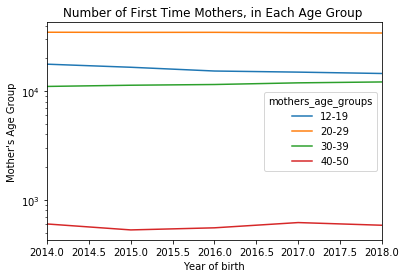

In [16]:
plot_gpYR(first_child,'mothers_age_groups','Year of birth',
          "Mother's Age Group",'Number of First Time Mothers, in Each Age Group ')
plt.savefig('./Saved_Visualizations/mother_1stchild_ts.pdf')
plt.savefig('./Saved_Visualizations/mother_1stchild_ts.png')

<Figure size 1440x1440 with 0 Axes>

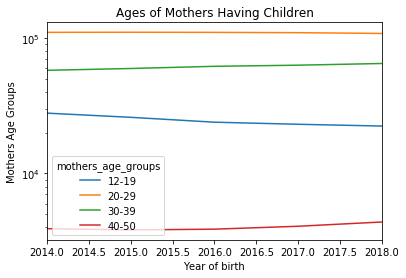

In [20]:
plot_gpYR(totDF,'mothers_age_groups','Year of birth',
        'Mothers Age Groups','Ages of Mothers Having Children')

plt.savefig('./Saved_Visualizations/mother_agegroup_ts.pdf')
plt.savefig('./Saved_Visualizations/mother_agegroup_ts.png')

<Figure size 1440x1440 with 0 Axes>

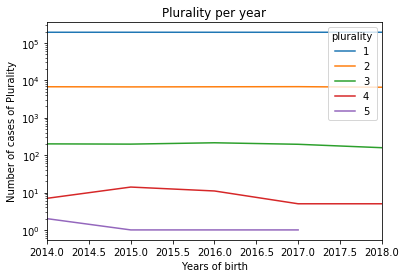

In [23]:
plot_gpYR(totDF,'plurality','Years of birth',
          'Number of cases of Plurality', 'Plurality per year')
plt.savefig('./Saved_Visualizations/plurality_ts.pdf')
plt.savefig('./Saved_Visualizations/plurality_ts.png')

<Figure size 1440x1440 with 0 Axes>

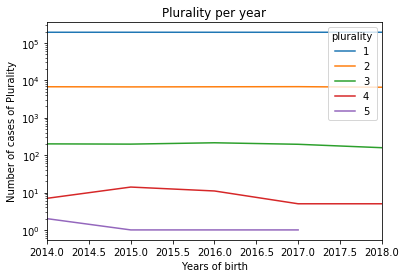

In [19]:
plot_gpYR(totDF,'plurality','Years of birth',
          'Number of cases of Plurality','Plurality per year')#,kind='bar')